<a href="https://colab.research.google.com/github/AnshumaanSingh1999/Datasetsforwork/blob/main/DataVisualizationReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1fZGikVsmI_TcXSfQY-ipSRcv-6KFVL_i/view?usp=sharing'
  
import pandas as pd 
  
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('911.csv')   
  
df = pd.read_csv('911.csv') 
print(df)

              lat        lng  ...                                     addr  e
0       40.297876 -75.581294  ...                   REINDEER CT & DEAD END  1
1       40.258061 -75.264680  ...               BRIAR PATH & WHITEMARSH LN  1
2       40.121182 -75.351975  ...                                 HAWS AVE  1
3       40.116153 -75.343513  ...                       AIRY ST & SWEDE ST  1
4       40.251492 -75.603350  ...                 CHERRYWOOD CT & DEAD END  1
...           ...        ...  ...                                      ... ..
663517  40.157956 -75.348060  ...                SUNSET AVE & WOODLAND AVE  1
663518  40.136306 -75.428697  ...              EAGLEVILLE RD & BUNTING CIR  1
663519  40.013779 -75.300835  ...                     HAVERFORD STATION RD  1
663520  40.121603 -75.351437  ...                   MARSHALL ST & HAWS AVE  1
663521  40.015046 -75.299674  ...  HAVERFORD STATION RD & W MONTGOMERY AVE  1

[663522 rows x 9 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [ ]:
df['twp'].value_counts()

LOWER MERION       55490
ABINGTON           39947
NORRISTOWN         37633
UPPER MERION       36010
CHELTENHAM         30574
                   ...  
EAST GREENVILLE     1316
BRYN ATHYN          1254
GREEN LANE           385
PHILA COUNTY         267
LEHIGH COUNTY        190
Name: twp, Length: 68, dtype: int64

In [ ]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [ ]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [ ]:
len(df['title'].unique())

148

In [ ]:
df['title'].iloc[0]

'EMS: BACK PAINS/INJURY'

In [ ]:
x=df['title'].iloc[0]

In [ ]:
x.split(':')[0]

'EMS'

In [ ]:
df['Reason']=df['title'].apply(lambda title : title.split(':')[0])

In [ ]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [ ]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

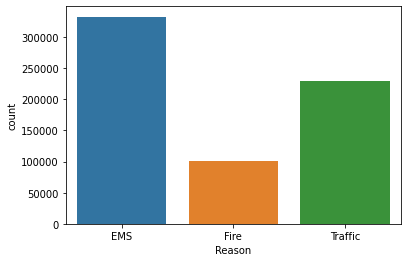

In [ ]:
sns.countplot(x='Reason',data=df)

In [ ]:
df['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [ ]:
type(df['timeStamp'].iloc[0])

str

In [ ]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [ ]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [ ]:
time = df['timeStamp'].iloc[0]
time.day

10

In [ ]:
time = df['timeStamp'].iloc[0]
time.year

2015

In [ ]:
time = df['timeStamp'].iloc[0]
time.dayofweek

3

In [ ]:
time = df['timeStamp'].iloc[0]
time.minute

10

In [ ]:
time


Timestamp('2015-12-10 17:10:52')

In [ ]:
df['Hour']=df['timeStamp'].apply(lambda time : time.hour)

In [ ]:
df['Month']=df['timeStamp'].apply(lambda time : time.month)

In [ ]:
df['Day of Week']=df['timeStamp'].apply(lambda time : time.dayofweek)

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          663522 non-null  float64       
 1   lng          663522 non-null  float64       
 2   desc         663522 non-null  object        
 3   zip          583323 non-null  float64       
 4   title        663522 non-null  object        
 5   timeStamp    663522 non-null  datetime64[ns]
 6   twp          663229 non-null  object        
 7   addr         663522 non-null  object        
 8   e            663522 non-null  int64         
 9   Reason       663522 non-null  object        
 10  Hour         663522 non-null  int64         
 11  Month        663522 non-null  int64         
 12  Day of Week  663522 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 65.8+ MB


In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun',}

In [ ]:
df['Day of Week']=df['Day of Week'].map(dmap)

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


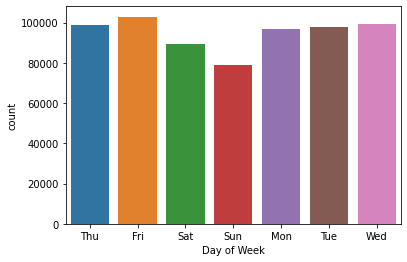

In [ ]:
sns.countplot(x='Day of Week',data=df)

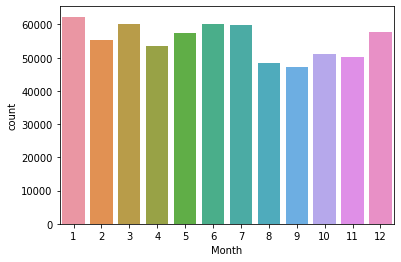

In [ ]:
sns.countplot(x='Month',data=df)

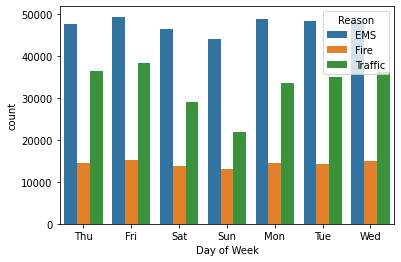

In [ ]:
sns.countplot(x='Day of Week',data=df,hue='Reason')

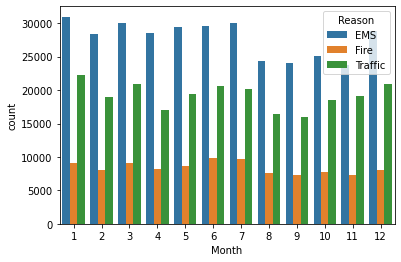

In [ ]:
sns.countplot(x='Month',data=df,hue='Reason')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   lat          663522 non-null  float64       
 1   lng          663522 non-null  float64       
 2   desc         663522 non-null  object        
 3   zip          583323 non-null  float64       
 4   title        663522 non-null  object        
 5   timeStamp    663522 non-null  datetime64[ns]
 6   twp          663229 non-null  object        
 7   addr         663522 non-null  object        
 8   e            663522 non-null  int64         
 9   Reason       663522 non-null  object        
 10  Hour         663522 non-null  int64         
 11  Month        663522 non-null  int64         
 12  Day of Week  663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 65.8+ MB


In [ ]:
df.describe()


,lat,lng,zip,e,Hour,Month
count,663522.000000,663522.000000,583323.000000,663522.0,663522.000000,663522.000000
mean,40.158162,-75.300105,19236.055791,1.0,13.044202,6.334414
std,0.220641,1.672884,298.222637,0.0,5.652192,3.475113
min,0.000000,-119.698206,1104.000000,1.0,0.000000,1.000000
25%,40.100344,-75.392735,19038.000000,1.0,9.000000,3.000000
50%,40.143927,-75.305143,19401.000000,1.0,13.000000,6.000000
75%,40.229008,-75.211865,19446.000000,1.0,17.000000,9.000000
max,51.335390,87.854975,77316.000000,1.0,23.000000,12.000000
